In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from census import Census
import gmaps
import os
from us import states
from pathlib import Path
%matplotlib inline

# Census & gmaps API Keys
api_key = os.getenv("CENSUS_API_KEY")
mapbox_key = os.getenv("MAPBOX_API_KEY")
c_2018 = Census(api_key, year=2018)
c_2017 = Census(api_key, year=2017)
c_2016 = Census(api_key, year=2016)
c_2015 = Census(api_key, year=2015)
c_2014 = Census(api_key, year=2014)
c_2013 = Census(api_key, year=2013)
c_2012 = Census(api_key, year=2012)
c_2011 = Census(api_key, year=2011)
c_2010 = Census(api_key, year=2010)
c_2009 = Census(api_key, year=2009)
c_2008 = Census(api_key, year=2008)
c_2007 = Census(api_key, year=2007)
c_2006 = Census(api_key, year=2006)
c_2005 = Census(api_key, year=2005)
c_2004 = Census(api_key, year=2004)

# Configure gmaps
# gmaps.configure(api_key=gkey)

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import style
import seaborn as sns
import hvplot.pandas
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

# Import panel packages for dashboard
import panel as pn
import plotly.express as px
from panel.interact import interact
from panel import widgets

# Initialize extensions for plotly panel
pn.extension('plotly')
pn.extension()

style.use('ggplot')

In [7]:
# Could read in data directly after fetching in the first run and save as pickle below
# census_occupation_gender_df = pd.read_pickle("census_2010_2018_panel_index_free_df.pickle")
census_occupation_gender_df = pd.read_pickle("../../Dashboard/Data/census_2010_2018_panel_df.pickle").reset_index()
census_occupation_gender_df.head()

Year State County                       Name  Population  Median Age  \
0  2010    36    005     Bronx County, New York   1386657.0        32.8   
1  2010    36    047     Kings County, New York   2508340.0        34.2   
2  2010    36    061  New York County, New York   1586698.0        36.4   
3  2010    36    081    Queens County, New York   2233841.0        37.3   
4  2010    36    085  Richmond County, New York    469363.0        38.7   

   Household Income  Per Capita Income  Poverty Count  Poverty Rate  ...  \
0           32568.0            16671.0       408584.0     29.465398  ...   
1           42143.0            23218.0       571936.0     22.801375  ...   
2           63832.0            56556.0       254289.0     16.026301  ...   
3           53054.0            24530.0       332165.0     14.869680  ...   
4           70560.0            30122.0        54353.0     11.580163  ...   

   Employed_female  Financial_managers_female  Financial_specialists_female  \
0         184353.0                     1549.0                        4344.0   
1         376222.0                     3503.0                       10787.0   
2         285240.0                     3924.0                       13964.0   
3         332019.0                     3813.0                       13008.0   
4          63558.0                      943.0                        1931.0   

   Accountants_&_auditors_female  Computer_female  Software_devops_female  \
0                         3544.0            926.0                   362.0   
1                         7354.0           4383.0                  2111.0   
2                         7023.0           3815.0                  1090.0   
3                         9999.0           3256.0                  1310.0   
4                         1726.0           1021.0                   765.0   

   Database_&_system_female  Information_age16+_total  Finance_and_insurance  \
0                       0.0                   49090.0                45770.0   
1                     585.0                   56023.0                60058.0   
2                     352.0                   82014.0               125112.0   
3                     199.0                   52500.0                61474.0   
4                      80.0                   65619.0                66770.0   

   Real_estate  
0      39340.0  
1      41348.0  
2      42421.0  
3      42878.0  
4      70510.0  

[5 rows x 28 columns]

In [8]:
fig_software_male = census_occupation_gender_df.hvplot.line(
    x='Year', y='Software_devops_male', rot=45,
    title='Software Developers by County - Male', groupby='Name', ylabel='Software Developers (k)').opts(yformatter="%.0f",
    line_color="darkolivegreen",
    hover_line_color="black",
    bgcolor="lightblue")
fig_software_male

:DynamicMap   [Name]
   :Curve   [Year]   (Software_devops_male)

In [9]:
fig_software_female = census_occupation_gender_df.hvplot.line(
    x='Year', y='Software_devops_female', rot=45,
    title='Software Developers by County - Female', groupby='Name', ylabel='Software Developers (k)').opts(yformatter="%.0f",
    line_color="deeppink",
    hover_line_color="darkorchid",
    bgcolor="lavender")
fig_software_female

:DynamicMap   [Name]
   :Curve   [Year]   (Software_devops_female)

In [10]:
fig_software_overlay = fig_software_male * fig_software_female
fig_software_overlay.opts(title='Software Developers by County')
fig_software_overlay

:DynamicMap   [Name]
   :Overlay
      .Curve.I  :Curve   [Year]   (Software_devops_male)
      .Curve.II :Curve   [Year]   (Software_devops_female)

In [11]:
fig_finance_male = census_occupation_gender_df.hvplot.line(
    x='Year', y='Financial_specialists_male', rot=45,
    title='Financial Specialists by County - Male', groupby='Name', ylabel='Financial Specialists (k)').opts(yformatter="%.0f",
    line_color="darkolivegreen",
    hover_line_color="black",
    bgcolor="lightblue")
fig_finance_male

:DynamicMap   [Name]
   :Curve   [Year]   (Financial_specialists_male)

In [12]:
fig_finance_female = census_occupation_gender_df.hvplot.line(
    x='Year', y='Financial_specialists_female', rot=45,
    title='Financial Specialists by County - Female', groupby='Name', ylabel='Financial Specialists (k)').opts(yformatter="%.0f",
    line_color="deeppink",
    hover_line_color="darkorchid",
    bgcolor="lavender")
fig_finance_female

:DynamicMap   [Name]
   :Curve   [Year]   (Financial_specialists_female)

In [13]:
fig_finance_overlay = fig_finance_male * fig_finance_female
fig_finance_overlay.opts(title='Financial Specialists by County')
fig_finance_overlay

:DynamicMap   [Name]
   :Overlay
      .Curve.I  :Curve   [Year]   (Financial_specialists_male)
      .Curve.II :Curve   [Year]   (Financial_specialists_female)

In [14]:
average_software_female = (census_occupation_gender_df).groupby([census_occupation_gender_df['Name']]).mean()
average_software_female.reset_index(inplace=True)
average_software_female.sort_values(by='Software_devops_female', ascending=False, inplace=True)
mean_software_female = average_software_female.round(3)
mean_software_female

Name  Year   Population  Median Age  Household Income  \
1     Kings County, New York  2014  2590894.222      34.622         50007.111   
2  New York County, New York  2014  1627982.556      36.833         74308.889   
3    Queens County, New York  2014  2297989.667      38.000         59070.778   
4  Richmond County, New York  2014   473629.778      39.500         73671.222   
0     Bronx County, New York  2014  1428720.000      33.433         34708.000   

   Per Capita Income  Poverty Count  Poverty Rate  Employed_age16+_civilian  \
1          27899.111     568493.222        21.956                840661.222   
2          65171.889     273449.778        16.799                647964.000   
3          27346.111     323003.444        14.070                816705.667   
4          32259.444      58790.111        12.412                157327.889   
0          18630.667     415632.556        29.103                398101.778   

   Employed_male  ...  Employed_female  Financial_managers_female  \
1     443042.222  ...       397619.000                   3811.444   
2     343891.667  ...       304072.333                   6058.889   
3     462880.667  ...       353825.000                   4469.778   
4      89077.778  ...        68250.111                    960.333   
0     211758.222  ...       186343.556                   1412.778   

   Financial_specialists_female  Accountants_&_auditors_female  \
1                     11011.889                       7678.222   
2                     12861.889                       6824.667   
3                     13335.778                       9757.444   
4                      2371.444                       1769.556   
0                      4089.444                       2764.667   

   Computer_female  Software_devops_female  Database_&_system_female  \
1         5967.889                2836.333                   531.556   
2         6276.778                2125.444                   525.889   
3         4512.778                1747.667                   329.111   
4          994.333                 532.889                    41.222   
0         1041.000                 246.222                    79.667   

   Information_age16+_total  Finance_and_insurance  Real_estate  
1                 67042.111              76155.222    46699.333  
2                 88255.222             140888.778    60384.333  
3                 61651.111              66784.556    46760.000  
4                 68742.667              77738.111    56495.556  
0                 49848.778              52009.222    39894.889  

[5 rows x 26 columns]

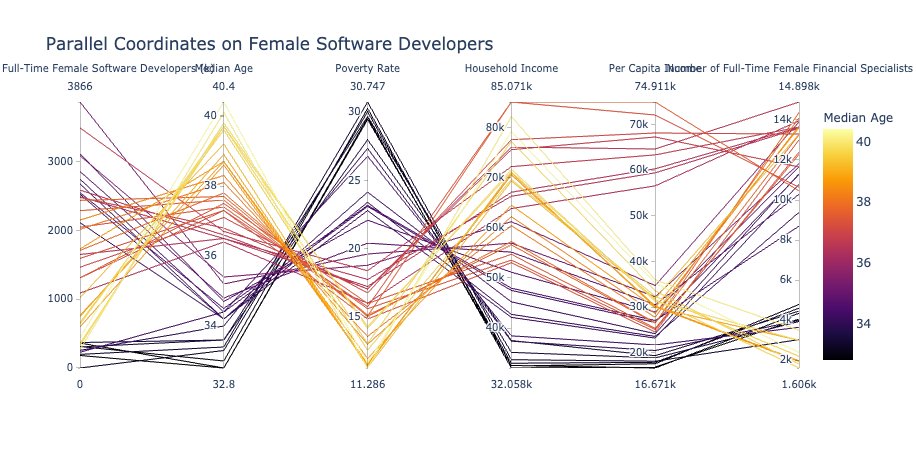

In [15]:
# 1a. Parallel Coordinates Plot - female
plot_parallel_coordinates_software_female = px.parallel_coordinates(
        census_occupation_gender_df,
        dimensions=['Software_devops_female', 'Median Age', 'Poverty Rate', 'Household Income', 'Per Capita Income', 'Financial_specialists_female'],
        color='Median Age',
        color_continuous_scale=px.colors.sequential.Inferno,
        title='Parallel Coordinates on Female Software Developers',
        labels={
            "Software_devops_female": "Number of Full-Time Female Software Developers (k)",
            "Median Age": "Median Age",
            'Poverty Rate': 'Poverty Rate',
            "Household Income": "Household Income",
            'Per Capita Income': 'Per Capita Income', 
            'Financial_specialists_female' : "Number of Full-Time Female Financial Specialists (k)"
            
        }
    )
    
plot_parallel_coordinates_software_female

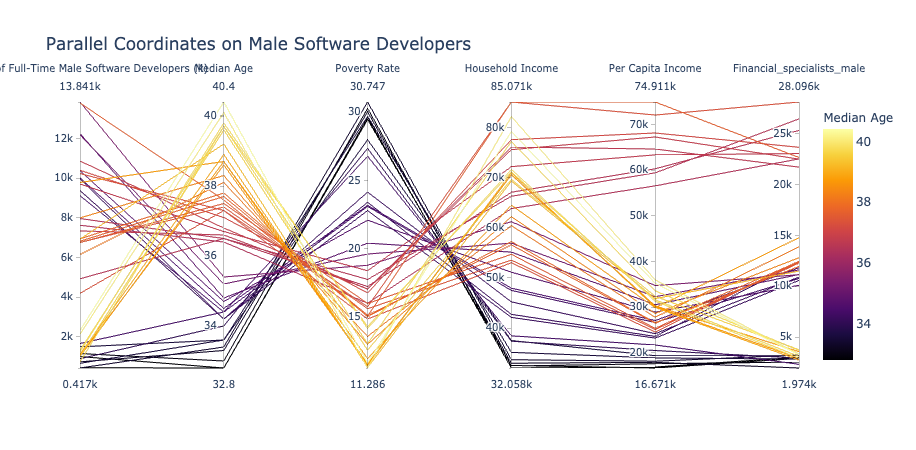

In [16]:
# 1b. Parallel Coordinates Plot - male
plot_parallel_coordinates_software_male = px.parallel_coordinates(
        census_occupation_gender_df,
        dimensions=['Software_devops_male', 'Median Age', 'Poverty Rate', 'Household Income', 'Per Capita Income', 'Financial_specialists_male'],
        color='Median Age',
        color_continuous_scale=px.colors.sequential.Inferno,
        title='Parallel Coordinates on Male Software Developers',
        labels={
            "Software_devops_male": "Number of Full-Time Male Software Developers (k)",
            "Median Age": "Median Age",
            'Poverty Rate': 'Poverty Rate',
            "Household Income": "Household Income",
            'Per Capita Income': 'Per Capita Income', 
            'Financial_specialists_female' : "Number of Full-Time Female Financial Specialists (k)"
            
        }
    )
    
plot_parallel_coordinates_software_male

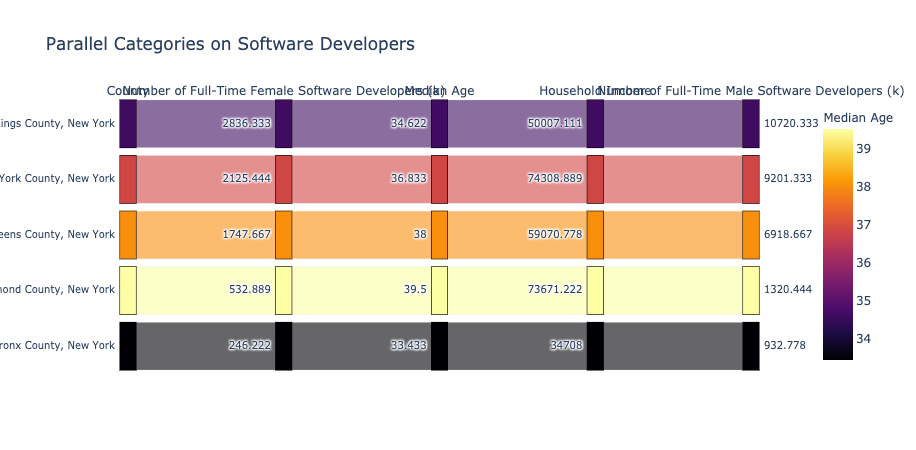

In [17]:
# 2a. Parallel Categories Plot - female vs. male
plot_parallel_categories_software_female = px.parallel_categories(
        mean_software_female,
        dimensions=['Name', 'Software_devops_female', 'Median Age', 'Household Income', 'Software_devops_male'],
        color='Median Age',
        color_continuous_scale=px.colors.sequential.Inferno, 
        title='Parallel Categories on Software Developers',
        labels={
           #     'Year': 'Year',
            'Name': 'County',
            "Software_devops_female": "Number of Full-Time Female Software Developers (k)",
            "Median Age": "Median Age",
            "Household Income": "Household Income",
  #          'Per Capita Income': 'Per Capita Income', 
  #          'Poverty Rate': 'Poverty Rate',
            'Software_devops_male': 'Number of Full-Time Male Software Developers (k)'
            
        }
    )
    
plot_parallel_categories_software_female

In [18]:
fig_scatter_software_female_age_annual = census_occupation_gender_df.hvplot.scatter(
    x='Median Age', y='Software_devops_female', rot=45,
    label='Developers vs. Age - Female', groupby=['Year'], ylabel='Software Developers (k)').opts(yformatter="%.0f",
    line_color="deeppink",
    hover_line_color="darkorchid",
    bgcolor="lavender")
fig_scatter_software_female_age_annual

:DynamicMap   [Year]
   :Scatter   [Median Age]   (Software_devops_female)

In [19]:
fig_scatter_software_male_age_annual = census_occupation_gender_df.hvplot.scatter(
    x='Median Age', y='Software_devops_male', rot=45,
    label='Developers vs. Age - Male', groupby=['Year'], ylabel='Software Developers (k)').opts(yformatter="%.0f",
    line_color="darkolivegreen",
    hover_line_color="black",
    bgcolor="lightblue")
fig_scatter_software_male_age_annual

:DynamicMap   [Year]
   :Scatter   [Median Age]   (Software_devops_male)

In [20]:
fig_scatter_software_age_annual_overlay = fig_scatter_software_male_age_annual * fig_scatter_software_female_age_annual
fig_scatter_software_age_annual_overlay.opts(title='Developers vs. County Median Age by Year')
fig_scatter_software_age_annual_overlay

:DynamicMap   [Year]
   :Overlay
      .Scatter.Developers_vs_full_stop_Age_hyphen_minus_Male   :Scatter   [Median Age]   (Software_devops_male)
      .Scatter.Developers_vs_full_stop_Age_hyphen_minus_Female :Scatter   [Median Age]   (Software_devops_female)

In [21]:
fig_scatter_software_female_age_county = census_occupation_gender_df.hvplot.scatter(
    x='Median Age', y='Software_devops_female', rot=45,
    label='Developers vs. Age - Female', groupby=['Name'], ylabel='Software Developers (k)').opts(yformatter="%.0f",
    line_color="deeppink",
    hover_line_color="darkorchid",
    bgcolor="lavender")
fig_scatter_software_female_age_county

:DynamicMap   [Name]
   :Scatter   [Median Age]   (Software_devops_female)

In [22]:
fig_scatter_software_male_age_county = census_occupation_gender_df.hvplot.scatter(
    x='Median Age', y='Software_devops_male', rot=45,
    label='Developers vs. Age - Male', groupby=['Name'], ylabel='Software Developers (k)').opts(yformatter="%.0f",
    line_color="darkolivegreen",
    hover_line_color="black",
    bgcolor="lightblue")
fig_scatter_software_male_age_county

:DynamicMap   [Name]
   :Scatter   [Median Age]   (Software_devops_male)

In [23]:
fig_scatter_software_age_county_overlay = fig_scatter_software_male_age_county * fig_scatter_software_female_age_county
fig_scatter_software_age_county_overlay.opts(title='Developers vs. Median Age by County')
fig_scatter_software_age_county_overlay

:DynamicMap   [Name]
   :Overlay
      .Scatter.Developers_vs_full_stop_Age_hyphen_minus_Male   :Scatter   [Median Age]   (Software_devops_male)
      .Scatter.Developers_vs_full_stop_Age_hyphen_minus_Female :Scatter   [Median Age]   (Software_devops_female)

In [24]:
fig_scatter_software_female_household_income_annual = census_occupation_gender_df.hvplot.scatter(
    x='Household Income', y='Software_devops_female', rot=45,
    label='Developers vs. Household Income - Female', groupby=['Year'], ylabel='Software Developers (k)').opts(yformatter="%.0f",
    line_color="deeppink",
    hover_line_color="darkorchid",
    bgcolor="lavender")
fig_scatter_software_female_household_income_annual

:DynamicMap   [Year]
   :Scatter   [Household Income]   (Software_devops_female)

In [25]:
fig_scatter_software_male_household_income_annual = census_occupation_gender_df.hvplot.scatter(
    x='Household Income', y='Software_devops_male', rot=45,
    label='Developers vs. Household Income - Male', groupby=['Year'], ylabel='Software Developers (k)').opts(yformatter="%.0f",
    line_color="darkolivegreen",
    hover_line_color="black",
    bgcolor="lightblue")
fig_scatter_software_male_household_income_annual

:DynamicMap   [Year]
   :Scatter   [Household Income]   (Software_devops_male)

In [26]:
fig_scatter_software_household_income_annual_overlay = fig_scatter_software_male_household_income_annual * fig_scatter_software_female_household_income_annual
fig_scatter_software_household_income_annual_overlay.opts(title='Developers vs. Annual Household Income')
fig_scatter_software_household_income_annual_overlay

:DynamicMap   [Year]
   :Overlay
      .Scatter.Developers_vs_full_stop_Household_Income_hyphen_minus_Male   :Scatter   [Household Income]   (Software_devops_male)
      .Scatter.Developers_vs_full_stop_Household_Income_hyphen_minus_Female :Scatter   [Household Income]   (Software_devops_female)

In [27]:
fig_scatter_software_female_household_income_county = census_occupation_gender_df.hvplot.scatter(
    x='Household Income', y='Software_devops_female', rot=45,
    label='Developers vs. Household Income - Female', groupby=['Name'], ylabel='Software Developers (k)').opts(yformatter="%.0f",
    line_color="deeppink",
    hover_line_color="darkorchid",
    bgcolor="lavender")
fig_scatter_software_female_household_income_county

:DynamicMap   [Name]
   :Scatter   [Household Income]   (Software_devops_female)

In [28]:
fig_scatter_software_male_household_income_county = census_occupation_gender_df.hvplot.scatter(
    x='Household Income', y='Software_devops_male', rot=45,
    label='Developers vs. Household Income - Male', groupby=['Name'], ylabel='Software Developers (k)').opts(yformatter="%.0f",
    line_color="darkolivegreen",
    hover_line_color="black",
    bgcolor="lightblue")
fig_scatter_software_male_household_income_county

:DynamicMap   [Name]
   :Scatter   [Household Income]   (Software_devops_male)

In [29]:
fig_scatter_software_household_income_county_overlay = fig_scatter_software_male_household_income_county * fig_scatter_software_female_household_income_county
fig_scatter_software_household_income_county_overlay.opts(title='Developers vs. Household Income by County')
fig_scatter_software_household_income_county_overlay

:DynamicMap   [Name]
   :Overlay
      .Scatter.Developers_vs_full_stop_Household_Income_hyphen_minus_Male   :Scatter   [Household Income]   (Software_devops_male)
      .Scatter.Developers_vs_full_stop_Household_Income_hyphen_minus_Female :Scatter   [Household Income]   (Software_devops_female)

In [30]:
fig_scatter_software_female_percap_income_annual = census_occupation_gender_df.hvplot.scatter(
    x='Per Capita Income', y='Software_devops_female', rot=45,
    label='Software Developers vs. Per Capita Income - Female', groupby=['Year'], ylabel='Software Developers (k)').opts(yformatter="%.0f",
    line_color="deeppink",
    hover_line_color="darkorchid",
    bgcolor="lavender")
fig_scatter_software_female_percap_income_annual

:DynamicMap   [Year]
   :Scatter   [Per Capita Income]   (Software_devops_female)

In [31]:
fig_scatter_software_male_percap_income_annual = census_occupation_gender_df.hvplot.scatter(
    x='Per Capita Income', y='Software_devops_male', rot=45,
    label='Software Developers vs. Per Capita Income - Male', groupby=['Year'], ylabel='Software Developers (k)').opts(yformatter="%.0f",
    line_color="darkolivegreen",
    hover_line_color="black",
    bgcolor="lightblue")
fig_scatter_software_male_percap_income_annual

:DynamicMap   [Year]
   :Scatter   [Per Capita Income]   (Software_devops_male)

In [32]:
fig_scatter_software_percap_income_annual_overlay = fig_scatter_software_male_percap_income_annual * fig_scatter_software_female_percap_income_annual
fig_scatter_software_percap_income_annual_overlay.opts(title='Developers vs. Per Capita Income by Year')
fig_scatter_software_percap_income_annual_overlay

:DynamicMap   [Year]
   :Overlay
      .Scatter.Software_Developers_vs_full_stop_Per_Capita_Income_hyphen_minus_Male   :Scatter   [Per Capita Income]   (Software_devops_male)
      .Scatter.Software_Developers_vs_full_stop_Per_Capita_Income_hyphen_minus_Female :Scatter   [Per Capita Income]   (Software_devops_female)

In [33]:
fig_scatter_software_female_percap_income_county = census_occupation_gender_df.hvplot.scatter(
    x='Per Capita Income', y='Software_devops_female', rot=45,
    label='Software Developers vs. Per Capita Income - Female', groupby=['Name'], ylabel='Software Developers (k)').opts(yformatter="%.0f",
    line_color="deeppink",
    hover_line_color="darkorchid",
    bgcolor="lavender")
fig_scatter_software_female_percap_income_county

:DynamicMap   [Name]
   :Scatter   [Per Capita Income]   (Software_devops_female)

In [34]:
fig_scatter_software_male_percap_income_county = census_occupation_gender_df.hvplot.scatter(
    x='Per Capita Income', y='Software_devops_male', rot=45,
    label='Software Developers vs. Per Capita Income - Male', groupby=['Name'], ylabel='Software Developers (k)').opts(yformatter="%.0f",
    line_color="darkolivegreen",
    hover_line_color="black",
    bgcolor="lightblue")
fig_scatter_software_male_percap_income_county

:DynamicMap   [Name]
   :Scatter   [Per Capita Income]   (Software_devops_male)

In [35]:
fig_scatter_software_percap_income_county_overlay = fig_scatter_software_male_percap_income_county * fig_scatter_software_female_percap_income_county
fig_scatter_software_percap_income_county_overlay.opts(title='Developers vs. Per Capita Income by County')
fig_scatter_software_percap_income_county_overlay

:DynamicMap   [Name]
   :Overlay
      .Scatter.Software_Developers_vs_full_stop_Per_Capita_Income_hyphen_minus_Male   :Scatter   [Per Capita Income]   (Software_devops_male)
      .Scatter.Software_Developers_vs_full_stop_Per_Capita_Income_hyphen_minus_Female :Scatter   [Per Capita Income]   (Software_devops_female)

In [36]:
fig_scatter_software_female_poverty_annual = census_occupation_gender_df.hvplot.scatter(
    x='Poverty Rate', y='Software_devops_female', rot=45,
    label='Software Developers vs. Poverty Rate - Female', groupby=['Year'], ylabel='Software Developers (k)').opts(yformatter="%.0f",
    line_color="deeppink",
    hover_line_color="darkorchid",
    bgcolor="lavender")
fig_scatter_software_female_poverty_annual

:DynamicMap   [Year]
   :Scatter   [Poverty Rate]   (Software_devops_female)

In [37]:
fig_scatter_software_male_poverty_annual = census_occupation_gender_df.hvplot.scatter(
    x='Poverty Rate', y='Software_devops_male', rot=45,
    label='Software Developers vs. Poverty Rate - Male', groupby=['Year'], ylabel='Software Developers (k)').opts(yformatter="%.0f",
    line_color="darkolivegreen",
    hover_line_color="black",
    bgcolor="lightblue")
fig_scatter_software_male_poverty_annual

:DynamicMap   [Year]
   :Scatter   [Poverty Rate]   (Software_devops_male)

In [38]:
fig_scatter_software_poverty_annual_overlay = fig_scatter_software_male_poverty_annual * fig_scatter_software_female_poverty_annual
fig_scatter_software_poverty_annual_overlay.opts(title='Developers vs. Poverty Rate by Year')
fig_scatter_software_poverty_annual_overlay

:DynamicMap   [Year]
   :Overlay
      .Scatter.Software_Developers_vs_full_stop_Poverty_Rate_hyphen_minus_Male   :Scatter   [Poverty Rate]   (Software_devops_male)
      .Scatter.Software_Developers_vs_full_stop_Poverty_Rate_hyphen_minus_Female :Scatter   [Poverty Rate]   (Software_devops_female)

In [39]:
fig_scatter_software_female_poverty_county = census_occupation_gender_df.hvplot.scatter(
    x='Poverty Rate', y='Software_devops_female', rot=45,
    label='Software Developers vs. Poverty Rate - Female', groupby=['Name'], ylabel='Software Developers (k)').opts(yformatter="%.0f",
    line_color="deeppink",
    hover_line_color="darkorchid",
    bgcolor="lavender")
fig_scatter_software_female_poverty_county

:DynamicMap   [Name]
   :Scatter   [Poverty Rate]   (Software_devops_female)

In [40]:
fig_scatter_software_male_poverty_county = census_occupation_gender_df.hvplot.scatter(
    x='Poverty Rate', y='Software_devops_male', rot=45,
    label='Software Developers vs. Poverty Rate - Male', groupby=['Name'], ylabel='Software Developers (k)').opts(yformatter="%.0f",
    line_color="darkolivegreen",
    hover_line_color="black",
    bgcolor="lightblue")
fig_scatter_software_male_poverty_county

:DynamicMap   [Name]
   :Scatter   [Poverty Rate]   (Software_devops_male)

In [41]:
fig_scatter_software_poverty_county_overlay = fig_scatter_software_male_poverty_county * fig_scatter_software_female_poverty_county
fig_scatter_software_poverty_county_overlay.opts(title='Developers vs. Poverty Rate by County')
fig_scatter_software_poverty_county_overlay

:DynamicMap   [Name]
   :Overlay
      .Scatter.Software_Developers_vs_full_stop_Poverty_Rate_hyphen_minus_Male   :Scatter   [Poverty Rate]   (Software_devops_male)
      .Scatter.Software_Developers_vs_full_stop_Poverty_Rate_hyphen_minus_Female :Scatter   [Poverty Rate]   (Software_devops_female)